In [49]:
import pandas as pd
import numpy as np

survey_raw_df = pd.read_csv('stack-overflow-developer-survey-2020/survey_results_public.csv')
schema_fname = 'stack-overflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText



In [48]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

survey_df = survey_raw_df[selected_columns].copy()
schema = schema_raw[selected_columns]

survey_df['Age1stCode'] = pd.to_numeric(survey_df['Age1stCode'], errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce')

survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)
survey_df.drop(survey_df[survey_df['WorkWeekHrs'] > 140].index, inplace=True)

survey_df.where(~(survey_df['Gender'].str.contains(';', na=False)), np.nan, inplace=True)



<Axes: title={'center': 'Where do you live?'}, xlabel='Country', ylabel='count'>

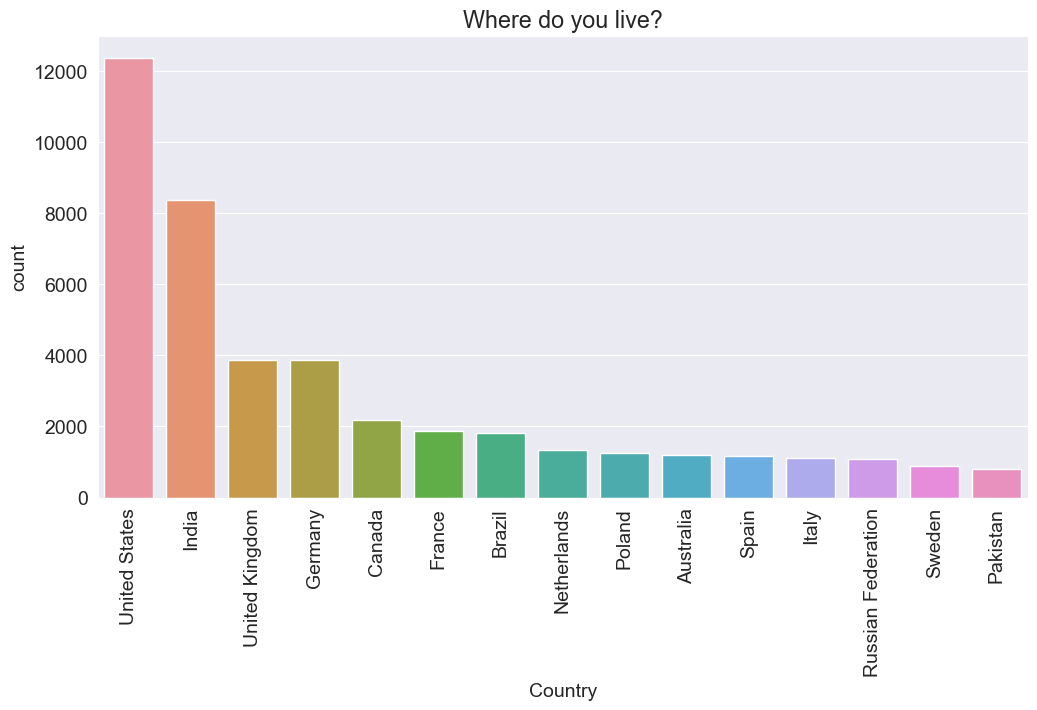

In [63]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

top_countries = survey_df['Country'].value_counts().head(15)

plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title(schema.Country)
sns.barplot(x = top_countries.index, y = top_countries)

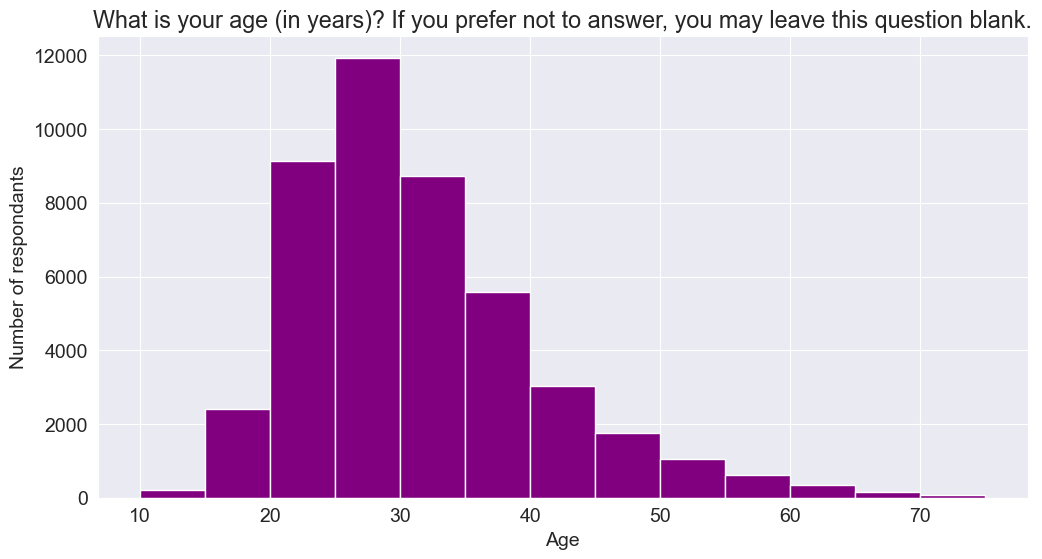

In [65]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondants')

plt.hist(survey_df['Age'], bins=np.arange(10, 80, 5), color='Purple');
